In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
%cd /Users/cgu3/Documents/conditional-graph-variational-autoencoder
%pwd

/Users/cgu3/Documents/conditional-graph-variational-autoencoder


'/Users/cgu3/Documents/conditional-graph-variational-autoencoder'

In [92]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df = pd.concat(data, ignore_index=True)

# Convert the DataFrame to a CSV file
# df.to_csv('results.csv', index=False)

/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal 

In [93]:
df

,dataset,split_ratio,seed,AUC,AP,execution_time
0,Cora,0.1,42,0.7438,0.8278,1.22
1,Cora,0.1,43,0.8595,0.8836,1.27
2,Cora,0.1,44,0.8182,0.8880,1.51
3,Cora,0.1,45,0.9339,0.9287,1.51
4,Cora,0.1,46,0.8843,0.8977,2.51
...,...,...,...,...,...,...
175,PubMed,0.9,47,0.9348,0.9382,25.76
176,PubMed,0.9,48,0.9462,0.9463,24.43
177,PubMed,0.9,49,0.9458,0.9478,26.27
178,PubMed,0.9,50,0.9386,0.9433,21.06


In [94]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df_agg = df.groupby(['dataset', 'split_ratio']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})
# ungroup the index
df_agg = df_agg.reset_index()

In [100]:
df_agg

dataset split_ratio      AUC                 AP          
                           mean       std     mean       std
0     Cora         0.1  0.80413  0.108330  0.83814  0.100202
1     Cora         0.2  0.83676  0.065759  0.84870  0.058872
2     Cora         0.3  0.83211  0.046529  0.83676  0.041762
3     Cora         0.4  0.84715  0.038615  0.85316  0.041073
4     Cora         0.5  0.84719  0.030189  0.84382  0.032914
5     Cora         0.6  0.84275  0.026565  0.83670  0.034514
6     Cora         0.7  0.85235  0.010309  0.84801  0.013439
7     Cora         0.8  0.85389  0.023183  0.85059  0.026785
8     Cora         0.9  0.85633  0.010156  0.85600  0.014503
9   PubMed         0.1  0.87309  0.053540  0.88427  0.041632
10  PubMed         0.2  0.91589  0.017097  0.91987  0.021604
11  PubMed         0.3  0.90600  0.018099  0.91266  0.016097
12  PubMed         0.4  0.92133  0.011828  0.92329  0.012431
13  PubMed         0.5  0.93303  0.005956  0.93681  0.005990
14  PubMed         0.6  0.93584  0.007772  0.93902  0.008762
15  PubMed         0.7  0.93680  0.004083  0.93979  0.004909
16  PubMed         0.8  0.94025  0.003436  0.94224  0.003581
17  PubMed         0.9  0.94256  0.004331  0.94420  0.003804

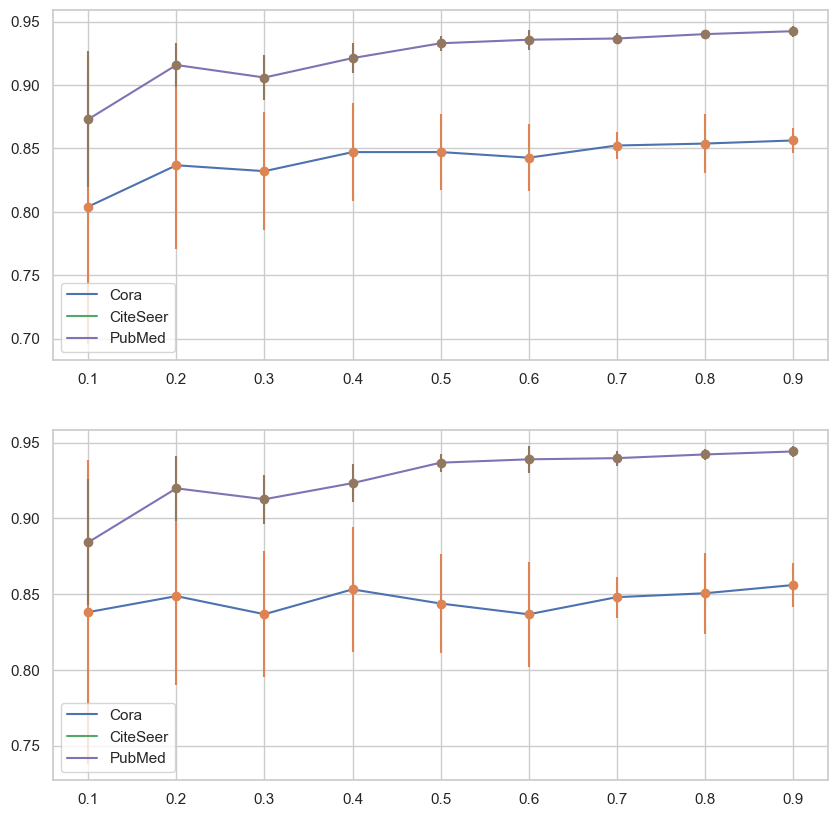

In [97]:
# plot lineplot for AUC and AP for each dataset and split_ratio
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'Cora']['AUC']['mean'], label='Cora')
# add error bar for AUC
ax[0].errorbar(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'Cora']['AUC']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'Cora']['AUC']['std'], fmt='o')
# axist 0 plot for CiteSeer
ax[0].plot(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'CiteSeer']['AUC']['mean'], label='CiteSeer')
# add error bar for AUC
ax[0].errorbar(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'CiteSeer']['AUC']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'CiteSeer']['AUC']['std'], fmt='o')
# axist 0 plot for PubMed
ax[0].plot(df_agg[df_agg['dataset'] == 'PubMed']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'PubMed']['AUC']['mean'], label='PubMed')
# add error bar for AUC
ax[0].errorbar(df_agg[df_agg['dataset'] == 'PubMed']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'PubMed']['AUC']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'PubMed']['AUC']['std'], fmt='o')
# add legend
ax[0].legend()
# axis 1 plot for AP
ax[1].plot(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'Cora']['AP']['mean'], label='Cora')
# add error bar for AP
ax[1].errorbar(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'Cora']['AP']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'Cora']['AP']['std'], fmt='o')
# axist 1 plot for CiteSeer
ax[1].plot(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'CiteSeer']['AP']['mean'], label='CiteSeer')
# add error bar for AP
ax[1].errorbar(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'CiteSeer']['AP']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'CiteSeer']['AP']['std'], fmt='o')
# axist 1 plot for PubMed
ax[1].plot(df_agg[df_agg['dataset'] == 'PubMed']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'PubMed']['AP']['mean'], label='PubMed')
# add error bar for AP
ax[1].errorbar(df_agg[df_agg['dataset'] == 'PubMed']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'PubMed']['AP']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'PubMed']['AP']['std'], fmt='o')
# add legend
ax[1].legend()

In [98]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/vgae_results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df_vgae = pd.concat(data, ignore_index=True)


/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal 

In [99]:
# calculate mean and std for auc and ap group by dataset
df_vgae.groupby(['dataset']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})

AUC                  AP          
              mean       std      mean       std
dataset                                         
CiteSeer  0.897250  0.016827  0.893160  0.017933
Cora      0.880982  0.011835  0.878855  0.012996
PubMed    0.903411  0.009961  0.899289  0.011446